# Import Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
names=["ID","Clump_Thickness","Uniform_cell_size","Uniform_cell_shape","Marginal_Adhesion","Single_epithelial_cell_size",
      "Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

df=pd.read_csv("C:/Users/AVA/Desktop/Data Science Ola/Meead/breast-cancer-wisconsin.data", names=names)
df.head(20)

,ID,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# df.to_csv(r'C:\Users\AVA\Desktop\Data Science Ola\Meead\BreastCancerData.csv', index = False)

In [4]:
# df.describe()

In [5]:
df.shape

(699, 11)

In [6]:
df.isnull().sum()

ID                             0
Clump_Thickness                0
Uniform_cell_size              0
Uniform_cell_shape             0
Marginal_Adhesion              0
Single_epithelial_cell_size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
# #handling missing values
df.replace('?',-99999,inplace=True)
# #drop ID column
df.drop(['ID'],axis=1,inplace=True)
df.head()

,Clump_Thickness,Uniform_cell_size,Uniform_cell_shape,Marginal_Adhesion,Single_epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
df.shape

(699, 10)

In [55]:
X = df.iloc[:, 0:9].values.astype('int')       # Feature variable
Y = df.iloc[:, 9].values.astype('int')        # Actual class label
print(type(Y))
print("\n Actual Class Labels : ", Y)
print("\n First row of Feature Variables ""(9 variables)"" : ", X[0])

<class 'numpy.ndarray'>

 Actual Class Labels :  [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2
 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 2 2 2 2 4 4 4 2 

In [43]:
# Class Label encoding M & B to 1 & 0
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print('After Encoding : ', Y)

After Encoding :  [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 

In [44]:
# Splitting data into test and training sets and randomly selecting in order to bias
# (sometimes they are highly correlated data)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [45]:
# Scaling our training data (feature scaling)
# Each feature in our dataset now will have a mean = 0 and standard deviation = 1

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

1
Error :  0.017905743077837037
Test Accuracy :  97.14285714285714 %
True Nagative 82
False Positive 3
False Negative 1
True Positive 54
Test Accuracy :  0.9714285714285714
Missclassification Rate :  0.02857142857142857
precision :  [0.98795181 0.94736842]
recall :  [0.96470588 0.98181818]
FScore :  [0.97619048 0.96428571]
Support :  [85 55]
Sensitivity or TPR :  0.9818181818181818
Specificity or TNR :  0.9647058823529412
False Positive Rate or Fallout :  0.03529411764705882
False Negative Rate :  0.01818181818181818
False Discovery Rate :  0.05263157894736842


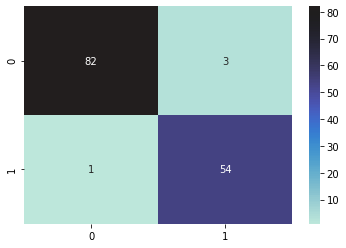


 Result: 1


In [56]:
# Model Building Stage
# Building the Neural Network

print(Y[:,None].shape[1])

class NeuralNetwork:
    def __init__(self, X, Y, X_test, Y_test, hidden_nodes=12, learninig_rate=0.01, epochs=20000):
        # data

        self.X = X
        self.Y = Y[:, None]
        self.X_test = X_test
        self.Y_test = Y_test
        
        np.random.seed(4)
        self.input_nodes = len(X[0])     # number of features in the training data
        self.hidden_nodes = hidden_nodes
        self.output_nodes = self.Y.shape[1]
        self.learning_rate = learninig_rate
        
        # initializing the weights for our network

        self.w1 = 2 * np.random.random((self.input_nodes, self.hidden_nodes)) - 1
        self.w2 = 2 * np.random.random((self.hidden_nodes, self.output_nodes)) - 1

        self.train(epochs)  # Since we have to train our model for many times we here pass epochs count
        self.test()

    
   # in between input and hidden layers
    # Defining the activation function as a sigmoid function
    def sigmoid(self, X):
        return (1 / (1 + np.exp(-X)))

    def sigmoid_prime(self, X):
        return X * (1 - X)



    def train(self, epochs):

        for e in range(epochs):
            # FORWARDPROPAGATION
            l1 = self.sigmoid(np.dot(self.X, self.w1))
            # in between hidden and output
            l2 = self.sigmoid(np.dot(l1, self.w2))
            
            # BACKPROPAGATION
            # Network error (True value - Predicted value)

            error = self.Y - l2
            
            # error for each of the layers

            l2_delta = error * self.sigmoid_prime(l2)
            l1_delta = l2_delta.dot(self.w2.T) * self.sigmoid_prime(l1)

            self.w2 = np.add(self.w2, l1.T.dot(l2_delta) * self.learning_rate)
            self.w1 = np.add(self.w1, self.X.T.dot(l1_delta) * self.learning_rate)

        print('Error : ', (abs(error)).mean())

         # testing and evaluation

    def test(self):
        correct = 0
        pred_list = []
        l1 = self.sigmoid(np.dot(self.X_test, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))

        for i in range(len(l2)):
            if l2[i] >= 0.5:
                pred = 1
            else:
                pred = 0

            if pred == self.Y_test[i]:
                correct += 1

            pred_list.append(pred)


        print('Test Accuracy : ', ((correct / len(Y_test)) * 100), '%')
        
        precision, recall,fscore, support =  precision_recall_fscore_support(Y_test, pred_list, average=None)

        tn, fp, fn, tp = confusion_matrix(Y_test, pred_list).ravel()
        print('True Nagative', tn)
        print('False Positive', fp)
        print('False Negative', fn)
        print('True Positive', tp)

        total = tn + tp + fn + fp

        print('Test Accuracy : ', (tn + tp)/total)
        print('Missclassification Rate : ', (fn + fp)/total)
        print('precision : ', precision)
        print('recall : ', recall)
        print('FScore : ', fscore)
        print('Support : ', support)
        print('Sensitivity or TPR : ', (tp/ (tp + fn)) )
        print('Specificity or TNR : ', (tn/(tn+fp)))
        print('False Positive Rate or Fallout : ', (fp/(fp+tn)))
        print('False Negative Rate : ', (fn/(fn+tp)))

        print('False Discovery Rate : ', (fp/(tp+fp)))

        cm = confusion_matrix(Y_test, pred_list)
        sns.heatmap(cm, annot=True , center=80)
        plt.savefig('h.png')
        plt.show()
        
    def predict(self,X):

        l1 = self.sigmoid(np.dot(X, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))
        for i in range(len(l2)):
            if l2[i] >= 0.5:
                pred = 1
            else:
                pred = 0

        return pred
    
nn = NeuralNetwork(X_train, Y_train, X_test, Y_test)

X_test2 = ([5, 1, 1, 1, 2, 1, 3, 1, 1])          # 5	1	1	1	2	1	3	1	1             #  1st row must be 0
# X_test2 = ([8, 10, 10, 8, 7, 10, 9, 7, 1])     #8	10	10	8	7	10	9	7	1                 #  5th row must be 1

pred = nn.predict(X_test2)
print("\n Result:", pred)